In [111]:
%%timeit
x = 3

19.7 ns ± 0.226 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [ ]:
%matplotlib inline

In [2]:
import pandas as pd

# Mental Rotation Performan Study Dataset

For each trial of an experiment, subjects were asked to judge *as quickly and accurately as they can* whether two different 3D objects onscreen were identical (if they were to be rotated) or not identical (no matter how the objects would be rotated).  Different trials either had  **Matching** or **NonMatching** objects, rotated about each other at different angles.  Subjects pressed a different key depending on their response, and their response time was recorded.

![Mental Rotation Example](http://gureckislab.org/courses/fall20/labincp/_images/shepard_stims.png)


Use the “MentalRotation.csv” file to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about this experiment!

In [3]:
df = pd.read_csv("MentalRotation.csv")
df[:5]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


## Examining the Data

Print the first 5 lines of the dataset

In [18]:
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


Print the last 3 lines of the dataset

In [20]:
df.tail(3)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


In [21]:
df[-3:]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


Print a *Sample* of 5 random lines in the dataset.

In [34]:
df.sample(5)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
2492,26,50,150,0,n,1417,1,27,F
4534,34,34,100,1,n,4685,0,25,M
4996,33,21,100,0,n,1524,1,20,F
2206,35,46,100,0,n,3813,1,25,F
192,24,4,100,1,n,4012,0,25,F


In [36]:
import numpy as np

In [37]:
df.iloc[np.random.randint(0, len(df), size=5)]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
2070,21,96,0,0,b,1248,0,33,M
3490,5,9,150,0,n,3440,1,18,M
1527,10,18,150,1,n,2982,0,20,F
707,23,45,50,0,n,1506,1,18,M
3809,19,54,50,0,n,3545,1,28,F


How Many Total Trials (rows) are in the study?

In [38]:
len(df)

5071

How many different subjects were in the study?

In [40]:
len(df.groupby('Subject'))

54

In [45]:
len(df.Subject.unique())

54

What different rotations were used for the objects?

In [46]:
df.Angle.unique()

array([  0, 150, 100,  50], dtype=int64)

In [113]:
df.Angle.value_counts().plot.bar()

<AxesSubplot:>

What is the maximum number of trials that one subject performed?

In [50]:
df.Trial.max()

96

In [53]:
df.groupby("Subject").Trial.count().max()

96

In [56]:
df.Subject.value_counts().max()

96

What is the minimum number of trials that one subject performed?

In [51]:
df.Trial.min()

1

In [54]:
df.groupby("Subject").Trial.count().min()

85

In [57]:
df.Subject.value_counts().min()

85

### Making New Columns

Convert the Time column to seconds by dividing it by 1000.

In [59]:
df['Secs'] = df['Time'] / 1000
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,Secs
0,49,1,0,0,n,3107,1,32,M,3.107
1,49,2,150,0,n,2930,1,32,M,2.930
2,49,3,150,1,b,1874,1,32,M,1.874
3,49,4,100,1,b,3793,1,32,M,3.793
4,49,5,50,1,b,2184,1,32,M,2.184


Change the "Correct" column to *bool* (True/False) using the **astype()** method

In [61]:
df.dtypes

Subject       int64
Trial         int64
Angle         int64
Matching      int64
Response     object
Time          int64
Correct       int64
Age           int64
Sex          object
Secs        float64
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Subject   5071 non-null   int64  
 1   Trial     5071 non-null   int64  
 2   Angle     5071 non-null   int64  
 3   Matching  5071 non-null   int64  
 4   Response  5071 non-null   object 
 5   Time      5071 non-null   int64  
 6   Correct   5071 non-null   int64  
 7   Age       5071 non-null   int64  
 8   Sex       5071 non-null   object 
 9   Secs      5071 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 396.3+ KB


In [65]:
df['IsCorrect'] = df.Correct.astype(bool)
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,Secs,IsCorrect
0,49,1,0,0,n,3107,1,32,M,3.107,True
1,49,2,150,0,n,2930,1,32,M,2.930,True
2,49,3,150,1,b,1874,1,32,M,1.874,True
3,49,4,100,1,b,3793,1,32,M,3.793,True
4,49,5,50,1,b,2184,1,32,M,2.184,True


Make a "YesResponse" bool column that is True if the subject reported that the objects were matching.
(Hint: the "Response" column contains the keyboard key that the subject pressed.)

In [66]:
df['YesResponse'] = df['Matching'] == 'b'
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,Secs,IsCorrect,YesResponse
0,49,1,0,0,n,3107,1,32,M,3.107,True,False
1,49,2,150,0,n,2930,1,32,M,2.930,True,False
2,49,3,150,1,b,1874,1,32,M,1.874,True,False
3,49,4,100,1,b,3793,1,32,M,3.793,True,False
4,49,5,50,1,b,2184,1,32,M,2.184,True,False


### Descriptive Statistics

What is the mean response time, across all trials?

In [67]:
df.Secs.mean()

2.7320932754880696

What percent of trials were answered correctly?

In [77]:
f"{df.Correct.mean():.2%}"

'90.46%'

In [72]:
df.Correct.value_counts(normalize=True)

1    0.904555
0    0.095445
Name: Correct, dtype: float64

What percent of trials were “Matching” trials?

Is there a difference in accuracy between matching and non-matching trials?

Is there a response time difference between matching and nonmatching
trials?

Is there a response time difference between matching and nonmatching trials, for different rotation Angles?

### Plotting Exercises

Plot the response time distribution as a histogram.  (plt.hist(), df.hist(), sns.distplot() all work)

In [4]:
import seaborn as sns

In [5]:
sns.displot(df.Time, kind='kde');

<IPython.core.display.Javascript object>

Plot the average response time for each stimulus category (matching and non-matching), (sns.catplot)

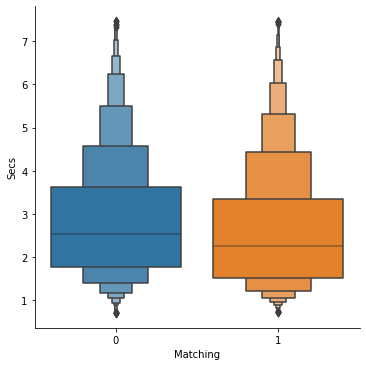

In [108]:
sns.catplot(data=df, x='Matching', y='Secs', kind='boxen');

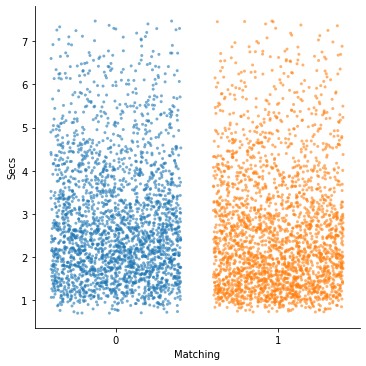

In [100]:
sns.catplot(data=df, x='Matching', y='Secs', jitter=.4, alpha=.6, s=3);

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship (plt.scatter(), sns.lmplot(), sns.jointplot())

Is there a difference in the relationship between Angle of mental rotation and response time, between stimulus categories? (sns.catplot)

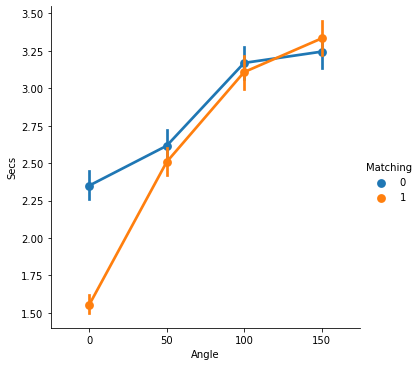

In [110]:
sns.catplot(data=df, x='Angle', y='Secs', hue='Matching', kind='point');

### Extra Plotting

If you're interested, try out another plotting library! Plotly Express has an interface similar to Seaborn, and makes some interesting plots in the notebook

https://plotly.com/python/getting-started/

https://plotly.com/python-api-reference/plotly.express.html

In [ ]:
#  !pip install plotly==4.14.3
#  !conda install -y "ipywidgets>=7.5"

In [14]:
!jupyter labextension install jupyterlab-plotly@4.14.3

An error occured.
RuntimeError: JupyterLab failed to build
See the log file for details:  C:\Users\Nick\AppData\Local\Temp\jupyterlab-debug-o17nuoh4.log


Building jupyterlab assets (production, minimized)


In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('MentalRotation.csv')

In [12]:
import plotly.express as px

In [13]:
px.scatter(data_frame=df, x='Angle', y='Time')